<a href="https://colab.research.google.com/github/matheustoneti/MachinePredictiveMaintenanceClassification/blob/main/Machine_Predictive_Maintenance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data import

In [131]:
data = pd.read_csv('predictive_maintenance.csv')

In [132]:
data.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,96,M14955,M,299.0,309.0,1351,52.2,44,0,No Failure
96,97,M14956,M,299.0,309.0,1575,35.3,47,0,No Failure
97,98,M14957,M,298.9,308.9,1750,29.9,50,0,No Failure
98,99,L47278,L,298.9,308.8,1529,32.7,53,0,No Failure


Data cleaning

In [133]:

data = data.drop(['Product ID'], axis=1)
data = data.dropna()

Data Exploration

In [134]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


In [135]:
dataF = (data['Target'] == 1).sum()
dataN = (data['Target'] == 0).sum()
total = dataN + dataF
print(f"{dataF} ({100*dataF/total:.2f}%) of the total machine failure in the dataset")
print(f"{dataN} ({100*dataN/total:.2f}%) of total machine working in the dataset")

339 (3.39%) of the total machine failure in the dataset
9661 (96.61%) of total machine working in the dataset


In [136]:
# Get unique values in the "Failure Type" column
unique_failure_types = data['Failure Type'].unique()

print(unique_failure_types)


['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [137]:
data


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [138]:


# Creating the new column
#data['is_failure'] = data['Failure Type'].apply(lambda x: 0 if x == 'No Failure' else 1)

 
# Convert "Failure Type" column to one-hot encoded columns
#df_one_hot = pd.get_dummies(data['Failure Type'], prefix='Type')

# Concatenate the one-hot encoded columns back to the original DataFrame (optional)
#data = pd.concat([data, df_one_hot], axis=1)

# Drop the original "Failure Type" column (optional)
#data.drop('Failure Type', axis=1, inplace=True)


In [139]:
data


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [140]:
# Convert "Failure Type" column to one-hot encoded columns
df_one_hot = pd.get_dummies(data['Type'], prefix='Type_')

# Concatenate the one-hot encoded columns back to the original DataFrame (optional)
data = pd.concat([data, df_one_hot], axis=1)

# Drop the original "Failure Type" column (optional)
data.drop('Type', axis=1, inplace=True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
 8   Type__H                  10000 non-null  uint8  
 9   Type__L                  10000 non-null  uint8  
 10  Type__M                  10000 non-null  uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 654.4+ KB


/tmp/ipykernel_1368461/1482649061.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


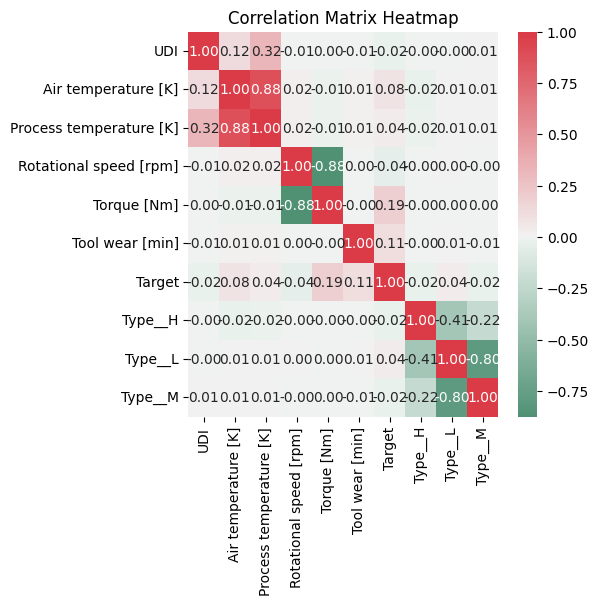

In [142]:
df = pd.DataFrame(data)
#df.drop('Failure Type', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(5, 5))

# Create a custom colormap from green (low correlation) to red (high correlation)
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, ax=ax)

# Set the title
ax.set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [143]:
columns_to_drop = ['Air temperature [K]','Type__M',"Rotational speed [rpm]"]
data = data.drop(columns=columns_to_drop)

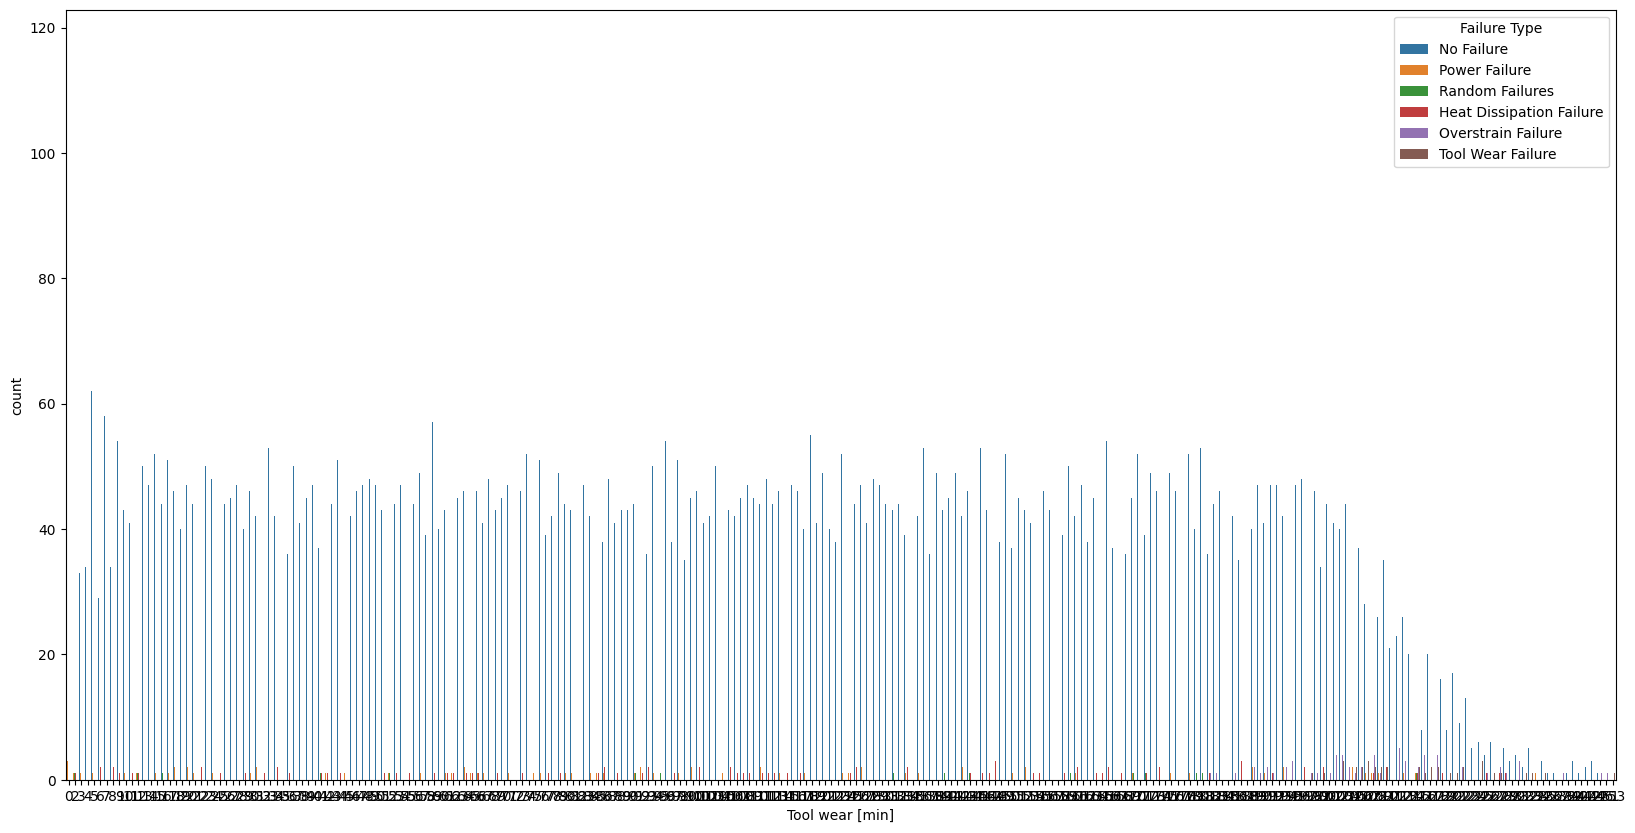

In [144]:

axe, fig = plt.subplots(figsize = (20,10))
axe = sns.countplot(x= data['Tool wear [min]'], hue = data['Failure Type'])

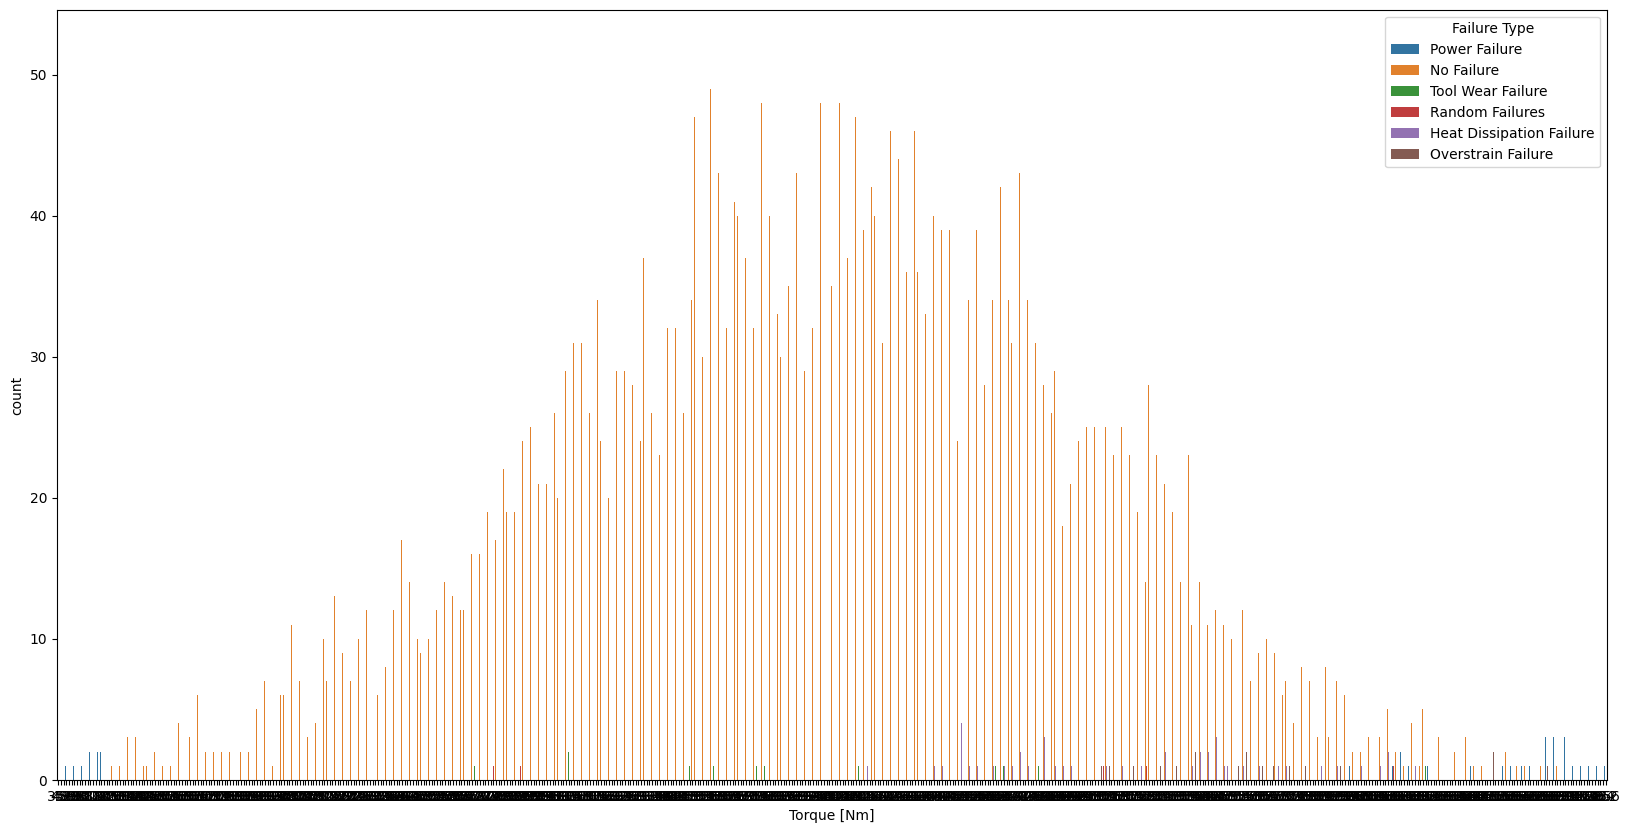

In [145]:

axe, fig = plt.subplots(figsize = (20,10))
axe = sns.countplot(x= data['Torque [Nm]'], hue = data['Failure Type'])

In [146]:
#data_pair_plot = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]
data_pair_plot = data[['Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type',"Type__H", "Type__L"]]

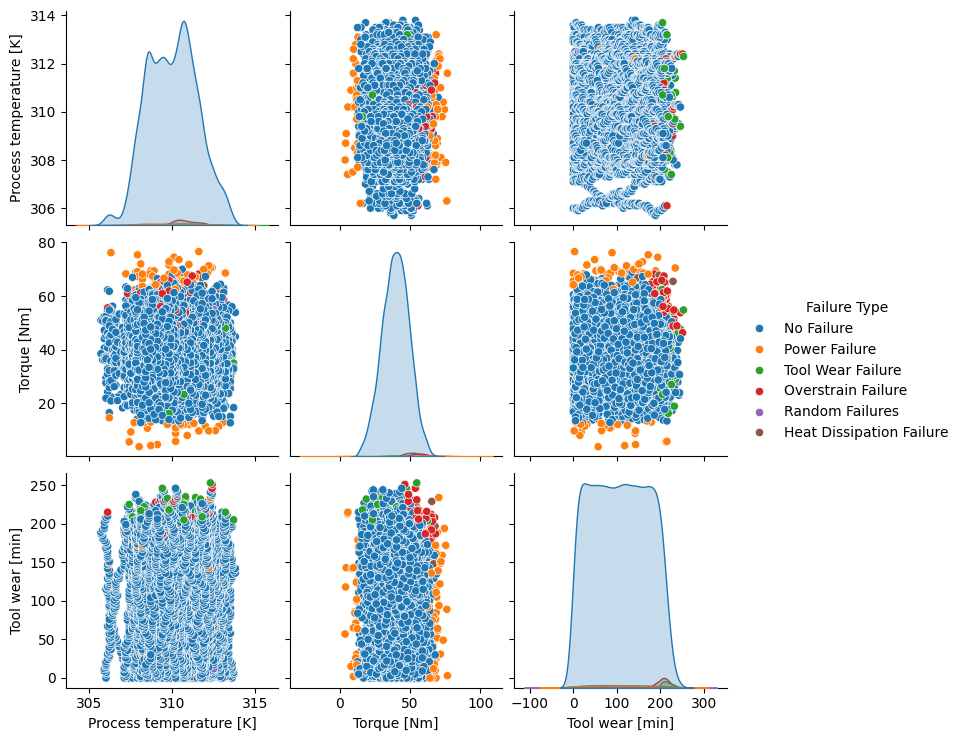

In [147]:
sns.pairplot(data = data_pair_plot, hue = 'Failure Type')

In [109]:
le = preprocessing.LabelEncoder()
# data['Type'] = le.fit_transform(data['Type'])
#data['Failure Type'] = le.fit_transform(data['Failure Type'])
unique_failure_types = data['Failure Type'].unique()

print(unique_failure_types)

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [110]:
#data.head(50)# Assuming df is your DataFrame
print(data.dtypes)

UDI                          int64
Process temperature [K]    float64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
Type__H                      uint8
Type__L                      uint8
dtype: object


In [111]:
import json
# Sample the data
sampled_data = pd.DataFrame()

# Sample 3 from '1'
sampled_1 = data[data['Failure Type'] == 'No Failure'].sample(n=3, random_state=1)
sampled_data = pd.concat([sampled_data, sampled_1])

# Sample 1 from each of [0, 2, 3, 4, 5]
for failure_type in ['Power Failure','Tool Wear Failure','Overstrain Failure','Random Failures','Heat Dissipation Failure']:
    sampled_type = data[data['Failure Type'] == failure_type].sample(n=1, random_state=1)
    sampled_data = pd.concat([sampled_data, sampled_type])

# Save to JSON
sampled_json = sampled_data.to_dict(orient='records')
with open('sampled_data.json', 'w') as f:
    json.dump(sampled_json, f, indent=4)

data = data.drop(sampled_data.index)


In [112]:

# le = preprocessing.LabelEncoder()
# data['Type'] = le.fit_transform(data['Type'])
# data['Failure Type'] = le.fit_transform(data['Failure Type'])
#data = data.drop(["Failure Type"], axis=1)
data['is_Failure'] = data['Failure Type'].apply(lambda x: 0 if x == "No Failure" else 1)
data =  data.drop(columns=["Target","Failure Type","UDI"])
data


,Process temperature [K],Torque [Nm],Tool wear [min],Type__H,Type__L,is_Failure
0,308.6,42.8,0,0,0,0
1,308.7,46.3,3,0,1,0
2,308.5,49.4,5,0,1,0
3,308.6,39.5,7,0,1,0
4,308.7,40.0,9,0,1,0
...,...,...,...,...,...,...
9995,308.4,29.5,14,0,0,0
9996,308.4,31.8,17,1,0,0
9997,308.6,33.4,22,0,0,0
9998,308.7,48.5,25,1,0,0


In [113]:
dataF = (data['is_Failure'] == 1).sum()
dataN = (data['is_Failure'] == 0).sum()
total = dataN + dataF
print(f"{dataF} ({100*dataF/total:.2f}%) of the total machine failure in the dataset")
print(f"{dataN} ({100*dataN/total:.2f}%) of total machine working in the dataset")

343 (3.43%) of the total machine failure in the dataset
9649 (96.57%) of total machine working in the dataset


In [114]:
y = data['is_Failure']
x = data.drop(['is_Failure'], axis = 1)

In [115]:
x.head(10)


,Process temperature [K],Torque [Nm],Tool wear [min],Type__H,Type__L
0,308.6,42.8,0,0,0
1,308.7,46.3,3,0,1
2,308.5,49.4,5,0,1
3,308.6,39.5,7,0,1
4,308.7,40.0,9,0,1
5,308.6,41.9,11,0,0
6,308.6,42.4,14,0,1
7,308.6,40.2,16,0,1
8,308.7,28.6,18,0,0
9,309.0,28.0,21,0,0


In [116]:
import numpy as np

def calculate_CM_score(confusion_matrix):
    alpha=1 
    beta=3
    # Convert the confusion matrix to a numpy array for easier indexing
    cm = np.array(confusion_matrix)
    
    # TN (True Negatives): Actual Working and Predicted Working
    # TP (True Positives): Actual Failure and Predicted Failure
    # FP (False Positives): Actual Working and Predicted Failure
    # FN (False Negatives): Actual Failure and Predicted Working
    
    # Extract TN, FP, FN, TP
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculate the score
    numerator = TN + TP
    denominator = TN + TP + alpha * FP + beta * FN
    score = numerator / denominator
    
    # Print the score
    print(f"confusion matrix score: {score:.4f}")
    return score


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = (0.3))
model_scores=[]

Gradient Boosting Classifier

accuracy: 0.8539026017344896
confusion matrix score: 0.8421


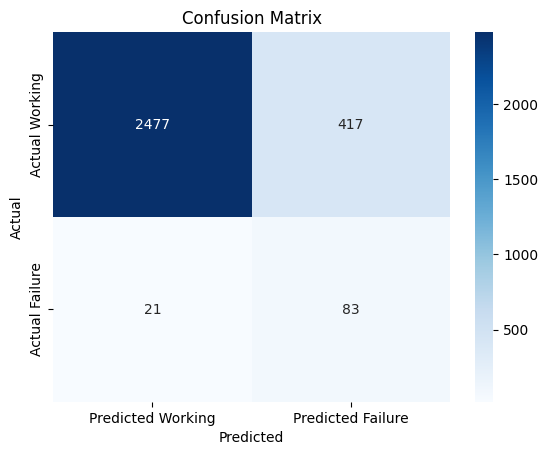

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the model with the computed sample weights
GradientBoostingClassifierModelWITHWeightAdjustment = GradientBoostingClassifier()
GradientBoostingClassifierModelWITHWeightAdjustment.fit(x_train, y_train, sample_weight=sample_weights)
accuracy = GradientBoostingClassifierModelWITHWeightAdjustment.score(x_test, y_test)


# Make predictions on the test set
y_pred = GradientBoostingClassifierModelWITHWeightAdjustment.predict(x_test)

print(f"accuracy: {accuracy}")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_score = calculate_CM_score(cm)
model_scores.append(["Gradient Boosting Classifier.", cm_score])

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [119]:

import pickle


# Save the model to a file
with open('modelo_gradient_boosting.pkl', 'wb') as f:
    pickle.dump(GradientBoostingClassifierModelWITHWeightAdjustment, f) 

RandomForestClassifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2894
           1       0.71      0.29      0.41       104

    accuracy                           0.97      2998
   macro avg       0.84      0.64      0.70      2998
weighted avg       0.97      0.97      0.97      2998

ROC-AUC Score: 0.8909
Precision-Recall AUC Score: 0.5107
confusion matrix score: 0.9256


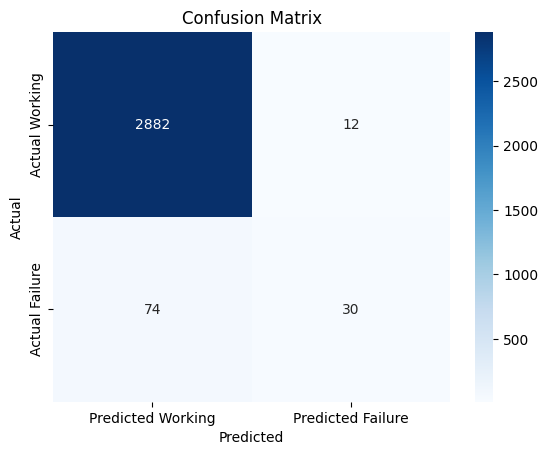

In [120]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
model_RandomForestClassifier = RandomForestClassifier(class_weight='balanced', random_state=42)
model_RandomForestClassifier.fit(x_train, y_train)

# Predictions
y_probs = model_RandomForestClassifier.predict_proba(x_test)[:, 1]
y_pred = model_RandomForestClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["RandomForestClassifier.", cm_score])


# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



RandomForestClassifier with Class Weight Adjustment (Auto)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2894
           1       0.23      0.48      0.31       104

    accuracy                           0.93      2998
   macro avg       0.61      0.71      0.64      2998
weighted avg       0.95      0.93      0.94      2998

ROC-AUC Score: 0.9024
Precision-Recall AUC Score: 0.4223
confusion matrix score: 0.8944


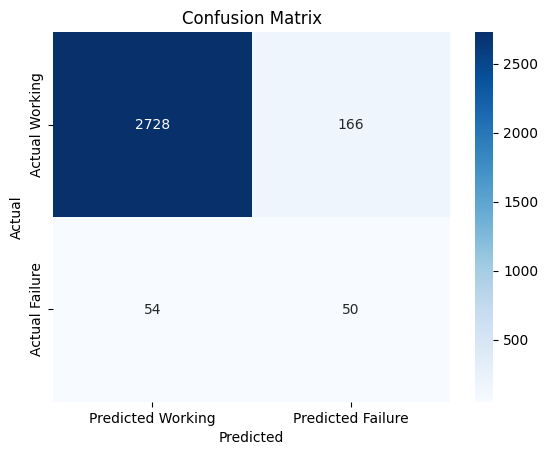

In [121]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialize and train the model (no class_weight parameter now)
model_RandomForestClassifier = RandomForestClassifier(random_state=42)
model_RandomForestClassifier.fit(x_train_resampled, y_train_resampled)

# Predictions
y_probs = model_RandomForestClassifier.predict_proba(x_test)[:, 1]
y_pred = model_RandomForestClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["RandomForestClassifier with Class Weight Adjustment (Auto).", cm_score])
# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



RandomForestClassifier with Combining Oversampling and Undersampling

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2894
           1       0.19      0.68      0.30       104

    accuracy                           0.89      2998
   macro avg       0.59      0.79      0.62      2998
weighted avg       0.96      0.89      0.92      2998

ROC-AUC Score: 0.9031
Precision-Recall AUC Score: 0.3254
confusion matrix score: 0.8714


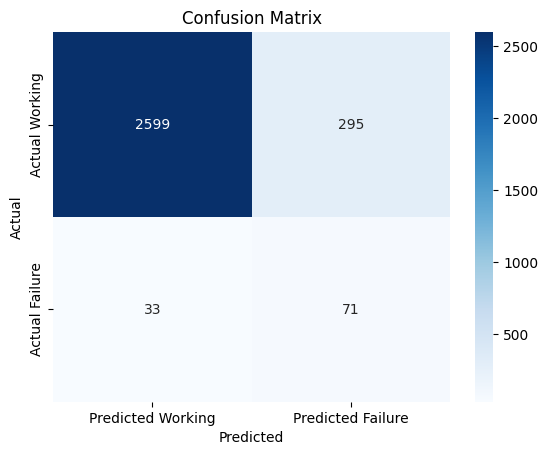

In [122]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTEENN to combine oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

# Initialize and train the model
model_RandomForestClassifier = RandomForestClassifier(random_state=42)
model_RandomForestClassifier.fit(x_train_resampled, y_train_resampled)

# Predictions
y_probs = model_RandomForestClassifier.predict_proba(x_test)[:, 1]
y_pred = model_RandomForestClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["RandomForestClassifier with Combining Oversampling and Undersampling.", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


CatBoostClassifier with Class Weight Adjustment

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2894
           1       0.19      0.72      0.30       104

    accuracy                           0.88      2998
   macro avg       0.59      0.81      0.62      2998
weighted avg       0.96      0.88      0.92      2998

ROC-AUC Score: 0.9167
Precision-Recall AUC Score: 0.4947
confusion matrix score: 0.8678


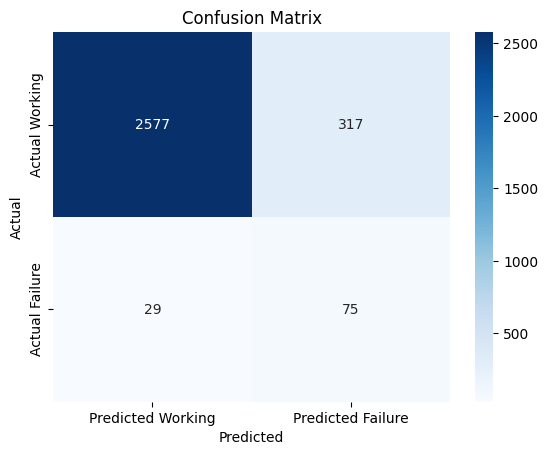

In [123]:

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the CatBoost model with class weights
class_weights = [1, 97]  # Adjust these weights based on your class imbalance ratio
model_CatBoostClassifier = CatBoostClassifier(class_weights=class_weights, random_state=42, verbose=0)
model_CatBoostClassifier.fit(x_train, y_train)

# Predictions
y_probs = model_CatBoostClassifier.predict_proba(x_test)[:, 1]
y_pred = model_CatBoostClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["CatBoostClassifier with Class Weight Adjustment.", cm_score])
# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


CatBoostClassifier Combining Oversampling and Undersampling

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2894
           1       0.19      0.73      0.30       104

    accuracy                           0.88      2998
   macro avg       0.59      0.81      0.62      2998
weighted avg       0.96      0.88      0.91      2998

ROC-AUC Score: 0.9114
Precision-Recall AUC Score: 0.4065
confusion matrix score: 0.8680


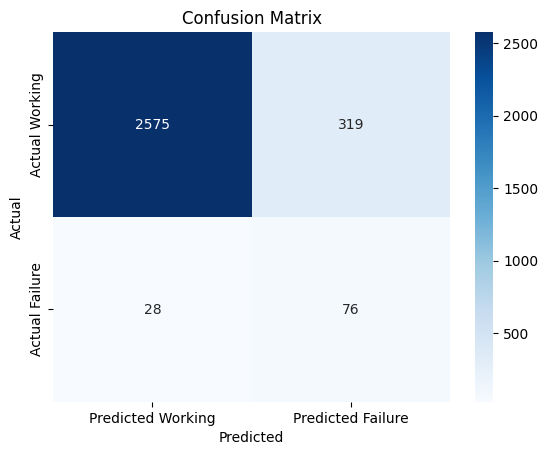

In [124]:

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTEENN to combine oversampling and undersampling
smote_enn = SMOTEENN(random_state=42)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train, y_train)

# Initialize and train the CatBoost model
model_CatBoostClassifier = CatBoostClassifier(random_state=42, verbose=0)
model_CatBoostClassifier.fit(x_train_resampled, y_train_resampled)

# Predictions
y_probs = model_CatBoostClassifier.predict_proba(x_test)[:, 1]
y_pred = model_CatBoostClassifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(f"Precision-Recall AUC Score: {auc(recall, precision):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["CatBoostClassifier Combining Oversampling and Undersampling.", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Neural network model

2024-09-01 17:24:49.392530: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 17:24:49.449085: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 17:24:49.508584: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-01 17:24:49.566329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-01 17:24:49.584131: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-01 17:24:49.691098: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9627 - loss: 0.2134 - val_accuracy: 0.9644 - val_loss: 0.1281
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.9711 - loss: 0.1107 - val_accuracy: 0.9625 - val_loss: 0.1170
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.9703 - loss: 0.1047 - val_accuracy: 0.9656 - val_loss: 0.1096
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.9678 - loss: 0.1051 - val_accuracy: 0.9669 - val_loss: 0.1062
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.9694 - loss: 0.0995 - val_accuracy: 0.9694 - val_loss: 0.1018
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.9702 - loss: 0.1000 - val_accuracy: 0.9694 - val_loss: 0.0999
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9709 - loss: 0.1021 - val_accuracy: 0.9694 - val_loss: 0.1012
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.9717 - loss: 0.0960 - va

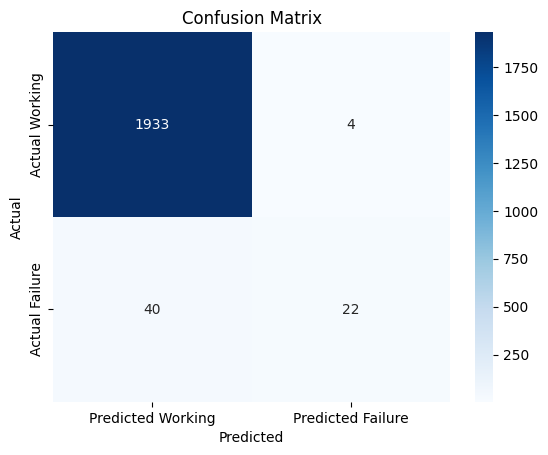

In [125]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the neural network model
model_NN = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compiling the model
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model_NN.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluating the model
loss, accuracy = model_NN.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
    
# Making predictions
y_probs = model_NN.predict(X_test).flatten()  # Predict probabilities
y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_score = calculate_CM_score(cm)
model_scores.append(["Neural network model", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Neural network model with Resampling

Epoch 1/50


/home/ibrahim/Desktop/BigProject/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.7926 - loss: 0.4643 - val_accuracy: 0.7345 - val_loss: 0.4928
Epoch 2/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.8535 - loss: 0.3130 - val_accuracy: 0.7825 - val_loss: 0.4249
Epoch 3/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8615 - loss: 0.2913 - val_accuracy: 0.8593 - val_loss: 0.3213
Epoch 4/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8645 - loss: 0.2845 - val_accuracy: 0.8399 - val_loss: 0.3500
Epoch 5/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8658 - loss: 0.2795 - val_accuracy: 0.8162 - val_loss: 0.3897
Epoch 6/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8677 - loss: 0.2796 - val_accuracy: 0.7900 - val_loss: 0.4388
Epoch 7/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.8686 - loss: 0.2763 - val_accuracy: 0.8697 - val_loss: 0.3019
Epoch 8/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.8652 - loss: 0.2791 - v

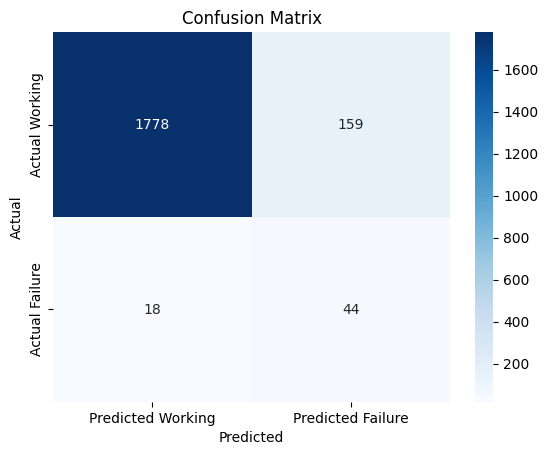

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Building the neural network model
model_NN_with_Smote = Sequential([
    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model_NN_with_Smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with class weights
history = model_NN_with_Smote.fit(X_resampled, y_resampled, epochs=50, batch_size=10, validation_split=0.2, class_weight=class_weight_dict)

# Making predictions
y_probs = model_NN_with_Smote.predict(X_test).flatten()  # Predict probabilities
y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm_score = calculate_CM_score(cm)
model_scores.append(["Neural network model with Resampling", cm_score])
# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Neural network model using Dropout(0.5) to reduce overfitting and Early Stopping.

Epoch 1/50


/home/ibrahim/Desktop/BigProject/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7195 - loss: 0.5774 - val_accuracy: 0.6412 - val_loss: 0.6100
Epoch 2/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8040 - loss: 0.4325 - val_accuracy: 0.7452 - val_loss: 0.4970
Epoch 3/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7978 - loss: 0.4228 - val_accuracy: 0.7611 - val_loss: 0.4677
Epoch 4/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8137 - loss: 0.3816 - val_accuracy: 0.7358 - val_loss: 0.4985
Epoch 5/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8195 - loss: 0.3764 - val_accuracy: 0.7595 - val_loss: 0.4436
Epoch 6/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8188 - loss: 0.3653 - val_accuracy: 0.7841 - val_loss: 0.3791
Epoch 7/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.8307 - loss: 0.3609 - val_accuracy: 0.7579 - val_loss: 0.4090
Epoch 8/50
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.8283 - loss: 0.3549 - val_acc

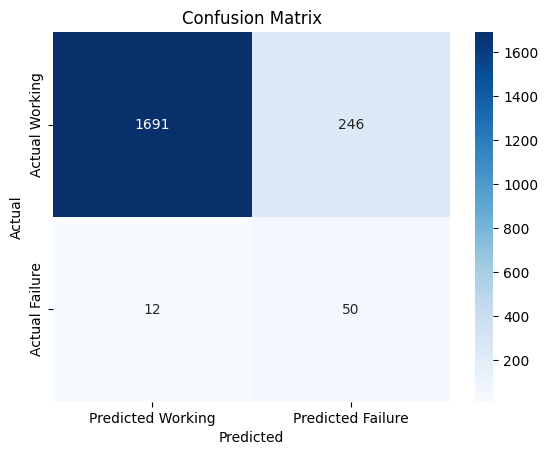

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weight_dict = dict(enumerate(class_weights))

# Building the neural network model with Dropout for regularization
model_NN_with_Smote = Sequential([
    Dense(64, input_dim=X_resampled.shape[1], activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(32, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')
])

# Compiling the model
model_NN_with_Smote.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with class weights
history = model_NN_with_Smote.fit(
    X_resampled, y_resampled, 
    epochs=50, 
    batch_size=10, 
    validation_split=0.2, 
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

# Making predictions
y_probs = model_NN_with_Smote.predict(X_test).flatten()  # Predict probabilities
y_pred = (y_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm_score = calculate_CM_score(cm)
model_scores.append(["Neural network model with Dropout, Early Stopping.", cm_score])

# Visualize the Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Working', 'Predicted Failure'], yticklabels=['Actual Working', 'Actual Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [128]:
#print(model_scores)
mm = []
mm.append(["Gradient Boosting Classifier.", 23])
print(model_scores)

[['Gradient Boosting Classifier.', 0.8421052631578947], ['RandomForestClassifier.', 0.9256198347107438], ['RandomForestClassifier with Class Weight Adjustment (Auto).', 0.8943979394719896], ['RandomForestClassifier with Combining Oversampling and Undersampling.', 0.8714099216710183], ['CatBoostClassifier with Class Weight Adjustment.', 0.8678010471204188], ['CatBoostClassifier Combining Oversampling and Undersampling.', 0.8680419122462344], ['Neural network model', 0.9403559403559404], ['Neural network model with Resampling', 0.8953316953316953], ['Neural network model with Dropout, Early Stopping.', 0.8606030647553139]]


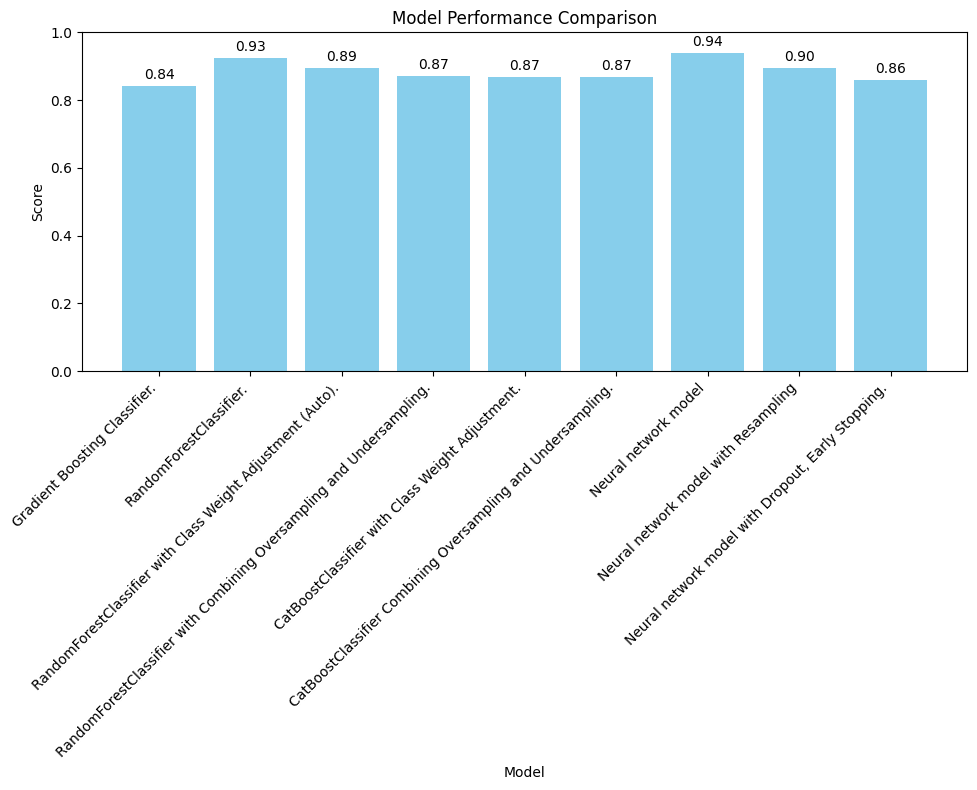

In [148]:
import matplotlib.pyplot as plt

def plot_model_scores(model_scores):
    # Extract model names and scores from the input list
    models = [model[0] for model in model_scores]
    scores = [model[1] for model in model_scores]

    # Create a bar chart
    plt.figure(figsize=(10, 8))
    plt.bar(models, scores, color='skyblue')

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.ylim(0, 1)  # Assuming scores are between 0 and 1
    
    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha='right')

    # Display the score values on top of the bars
    for i, score in enumerate(scores):
        plt.text(i, score + 0.02, f'{score:.2f}', ha='center')

    # Show the plot
    plt.tight_layout()  # Adjust layout to fit rotated labels
    plt.show()


plot_model_scores(model_scores)
